##### 
<span style='color:#FF5733'>   **'*'** **DISCLAIMER**</span>:
    -This project is a sole Intellectual property of mine i.e. <span style='color:#FF5733'>**GANDHARV GUPTA**</span>. Kindly acknowledge before copy or use of this project.The dataset is    open and is a property of Kaggle which holds all proprietary rights over it.</span>

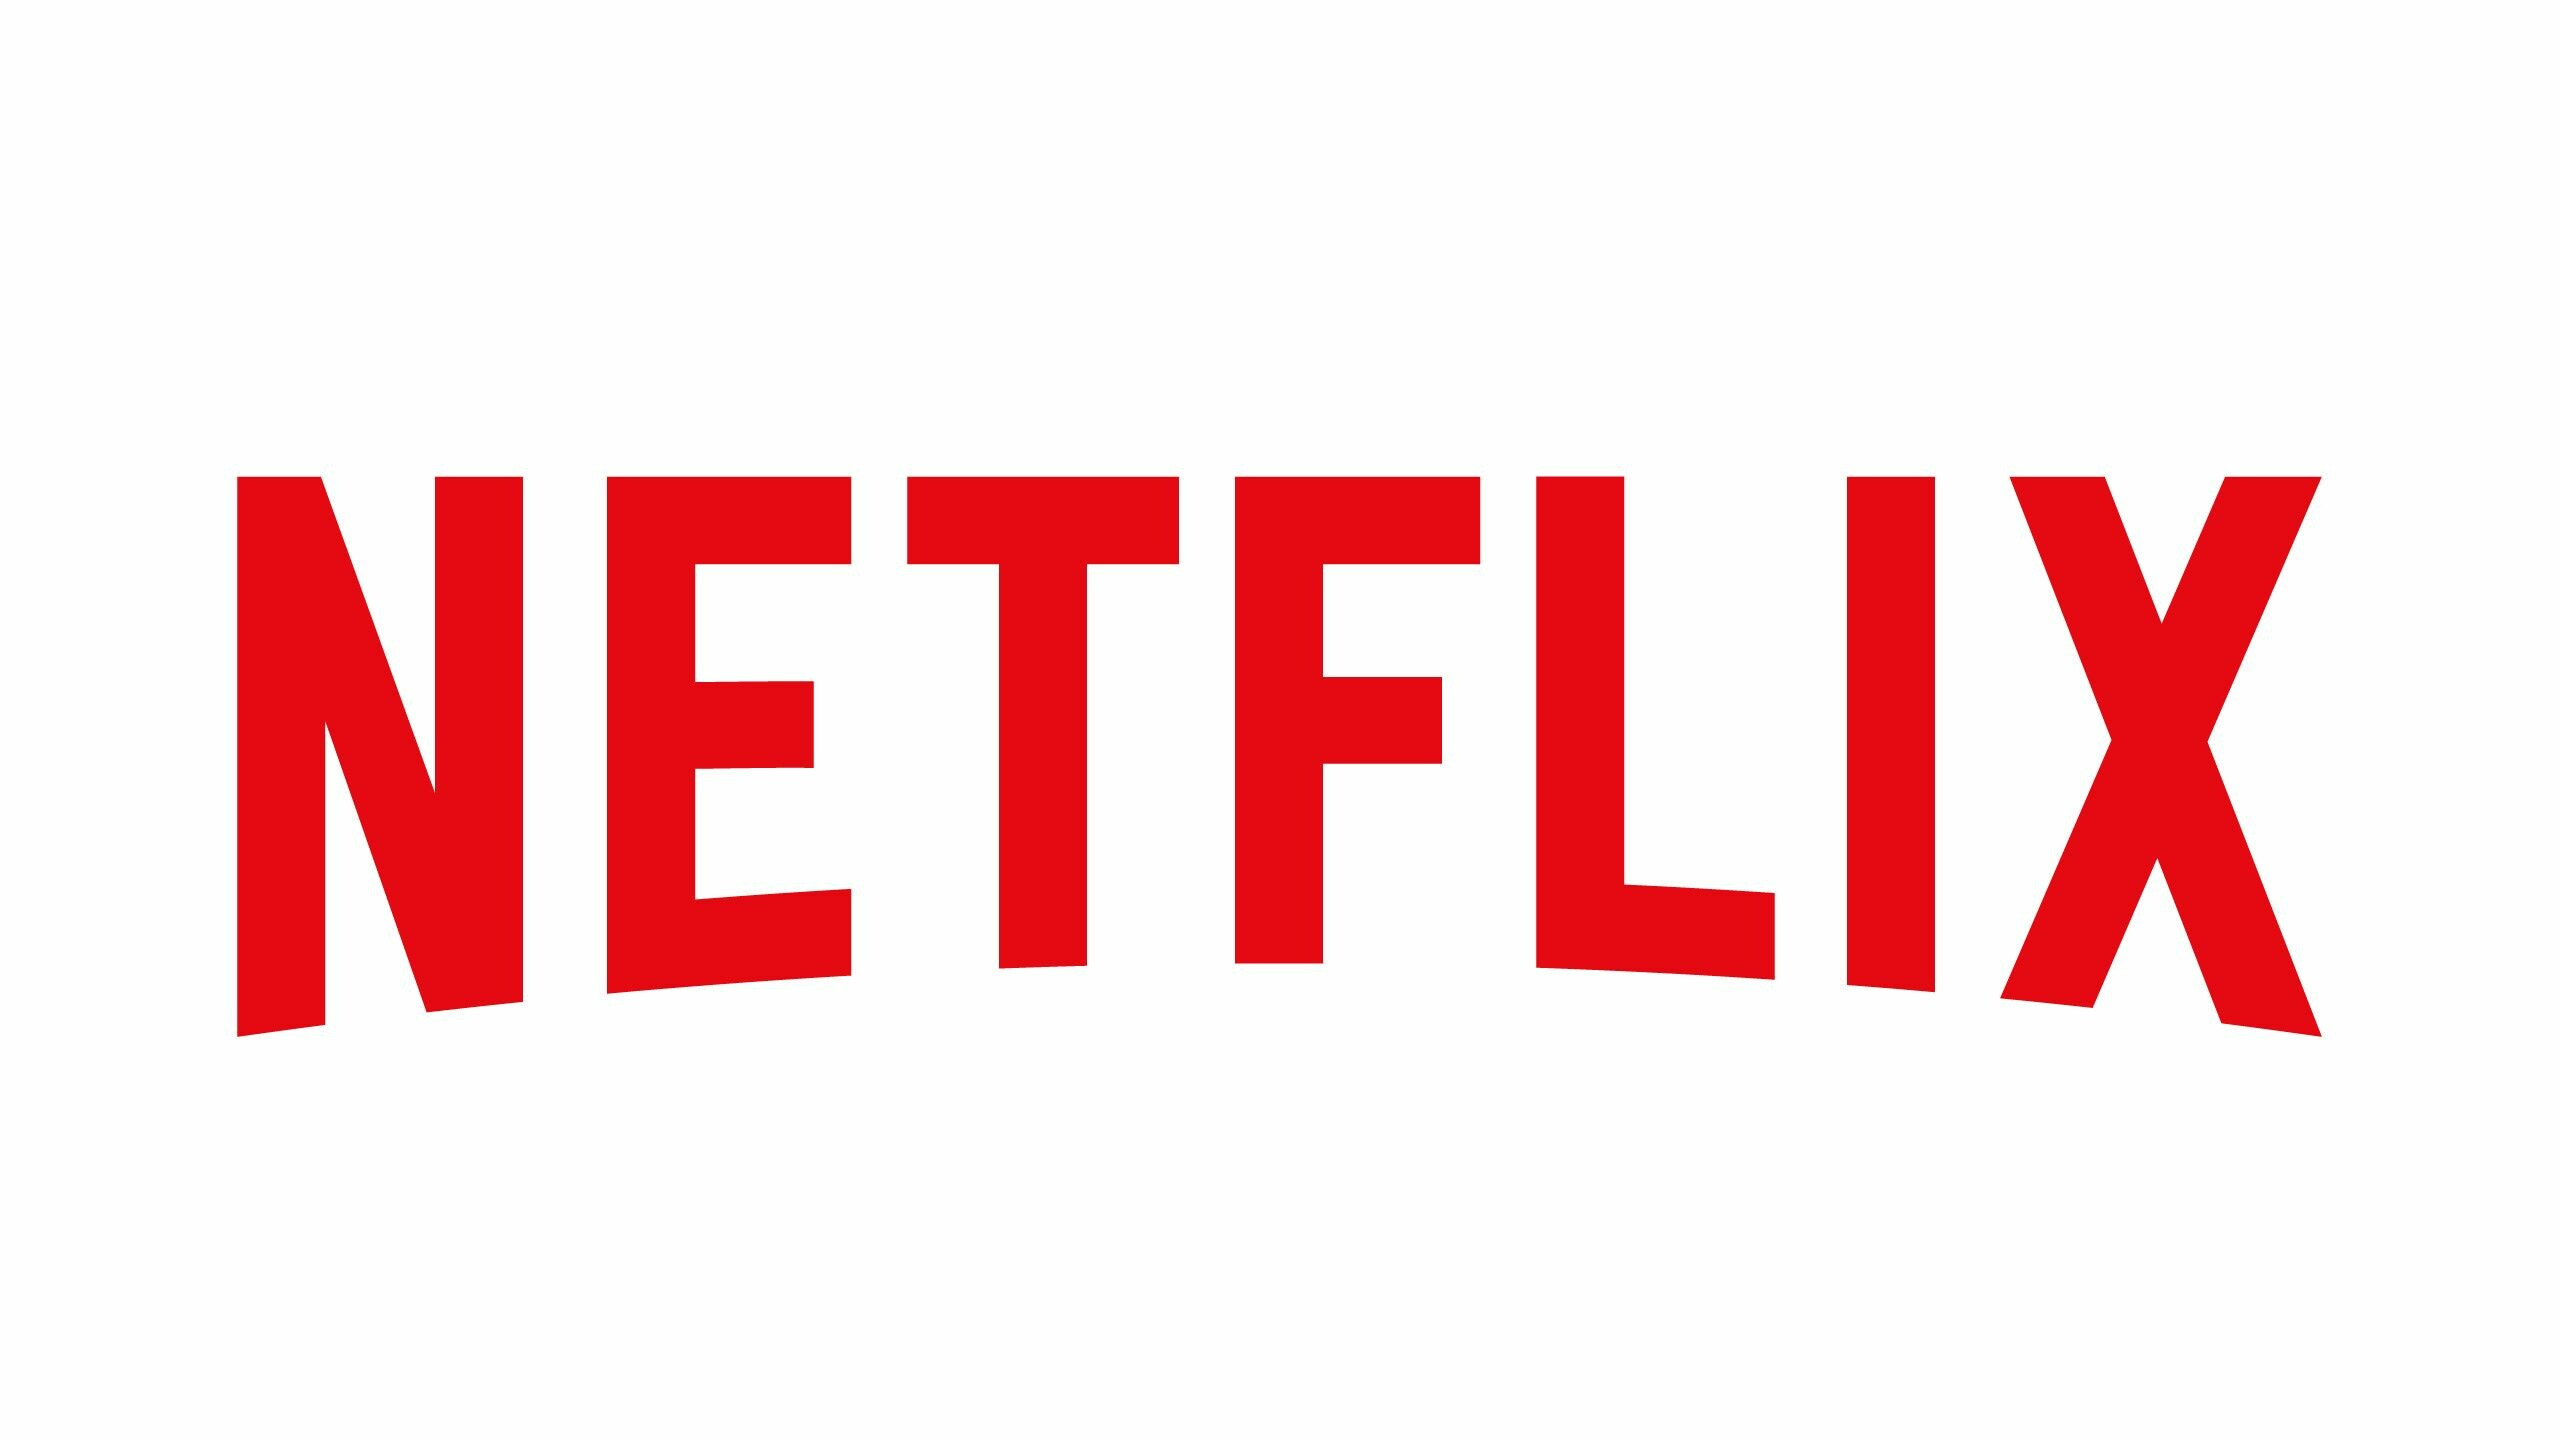

In [1]:

from IPython.display import Image
Image(filename=r"C:\Users\HP\Desktop\CODE\Data Science Projects\Netflix Region wise Revenue Generation Analysis with ML\netflix image2.jpg",width=400,height=500)

# Analyzing <span style='color:#FF5733'>**Netflix**</span>-Region Wise **Revenue Generation** and Predicting **Global Revenues** using **ML**    **[2024 Data]**

## <u>Model Description and Data Dictionary</u>:

-The CSV File contains Netflix revenue data from 2019 to 2024 for each of its financial year(from Jan 1st to 31st Dec.)

-Abbreviations: 

        -Global Revenue: Revenue collected Worldwide 
        -UCAN : United States and Canada
        -EMEA : Europe, Middle East and Africa
        -APAC : Asia-Pacific
        -LATM : Latin America
        -ARPU : Average revenue per member(for each quarter)


-All revenue is in US Dollars.



### <u>Problem Statement</u>: 
    -Analyzing -Which Region contributes MAXIMUM to GLOBAL revenue generation(that maximizes the profit)
    -Recommending-Which region has the highest potential for revenue generation

### <u>Predictor/Independent Variable:</u>: 

        -UCAN : United States and Canada
        -EMEA : Europe, Middle East and Africa
        -APAC : Asia-Pacific
        -LATM : Latin America
        -ARPU : Average revenue per member(for each quarter)

### <u>Dependent/Target Variable:</u>: 

        -Global Revenue: Revenue collected Worldwide 

### <u>Model Selection</u>:
    -The problem already has labelled data and requires prediction of a CONTINOUS NUMERICAL Variable,Hence,We will make a SUPERVISED LEARNING based REGRESSION MODEL
    -Also,Descriptive analysis will be done to know the revenue maximizing region
### <u>Data Source</u>:
    -A Kaggle based UNCLEEANED Netflix_revenue_data
    -File Type: A FLAT FILE(.CSV)     

# <span style='color:#FF5733'>**Netflix**</span> Region Wise **Revenue Generation** Analysis With **ML**

## Importing requisite **Libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## 1. **DATA COLLECTION**:
    -Data is read from FLAT FILE(.CSV) stored locally ,using pd.read_csv() API

In [3]:
path=r"C:\Users\HP\Desktop\CODE\Data Science Projects\Netflix Region wise Revenue Generation Analysis with ML\netflix_revenue_uncleaned.csv"
df=pd.read_csv(path)

In [4]:
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,?,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,?,12.52,10.13,8.14,9.29,?
2,30-09-2019,?,2621250000,1428040000,741434000,382304000,?,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,?,1562561000,746392000,418121000,67662000,?,31417000,?,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,?,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,?


In [5]:
df.shape

(21, 15)

In [6]:
df.size

315

----------------

## 2. **DATA WRANGLING,PREPROCESSING and CLEANING**:

    -Treating Missing values
    -Data Standardization
    -Feature Extraction(Extract Year from Date columns)
    -Converting Dollars-to-Cr
    -Rounding off values
    -Data Normalization by Feature Scaling(Z-Score)
    -Dropping columns that are not required(ARPU Columns )

### <u>2.1 Treating Null vales and Standardization</u>:

In [7]:
df=df.replace('?',np.nan)
df.head()

,Date,Global Revenue,UCAN Streaming Revenue,EMEA Streaming Revenue,LATM Streaming Revenue,APAC Streaming Revenue,UCAN Members,EMEA Members,LATM Members,APAC Members,UCAN ARPU,EMEA ARPU,LATM ARPU,APAC ARPU,Netflix Streaming Memberships
0,31-03-2019,4520992000,2256851000,1233379000,630472000,NaN,66633000,42542000,27547000,12141000,11.45,10.23,7.84,9.37,148863000
1,30-06-2019,4923116000,2501199000,1319087000,677136000,349494000,66501000,44229000,27890000,NaN,12.52,10.13,8.14,9.29,NaN
2,30-09-2019,NaN,2621250000,1428040000,741434000,382304000,NaN,47355000,29380000,14485000,13.08,10.40,8.63,9.29,158334000
3,31-12-2019,5467434000,NaN,1562561000,746392000,418121000,67662000,NaN,31417000,NaN,13.22,10.51,8.18,9.07,167090000
4,31-03-2020,5767691000,2702776000,1723474000,NaN,483660000,69969000,58734000,34318000,19835000,13.09,10.40,8.05,8.94,NaN


    -Counting Null Values in each column:

In [8]:
for i in df.columns:
    print(df[i].isnull().value_counts())

Date
False    21
Name: count, dtype: int64
Global Revenue
False    17
True      4
Name: count, dtype: int64
UCAN Streaming Revenue
False    20
True      1
Name: count, dtype: int64
EMEA Streaming Revenue
False    19
True      2
Name: count, dtype: int64
LATM Streaming Revenue
False    19
True      2
Name: count, dtype: int64
APAC Streaming Revenue
False    18
True      3
Name: count, dtype: int64
UCAN Members
False    18
True      3
Name: count, dtype: int64
EMEA  Members
False    19
True      2
Name: count, dtype: int64
LATM Members
False    19
True      2
Name: count, dtype: int64
APAC Members
False    16
True      5
Name: count, dtype: int64
UCAN ARPU
False    21
Name: count, dtype: int64
EMEA ARPU
False    21
Name: count, dtype: int64
LATM  ARPU
False    21
Name: count, dtype: int64
APAC  ARPU
False    20
True      1
Name: count, dtype: int64
Netflix Streaming Memberships 
False    17
True      4
Name: count, dtype: int64


#### <u>Satandardize:</u>

    -Rectifying dtypes of columns(to float)
    -Converting date column from object type to DATE type

In [9]:
df.dtypes

Date                               object
Global Revenue                     object
UCAN Streaming Revenue             object
EMEA Streaming Revenue             object
LATM Streaming Revenue             object
APAC Streaming Revenue             object
UCAN Members                       object
EMEA  Members                      object
LATM Members                       object
APAC Members                       object
UCAN ARPU                         float64
EMEA ARPU                         float64
LATM  ARPU                        float64
APAC  ARPU                         object
Netflix Streaming Memberships      object
dtype: object

In [10]:
df[['Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'UCAN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU',
       'APAC  ARPU', 'Netflix Streaming Memberships ']]=df[['Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'UCAN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU',
       'APAC  ARPU', 'Netflix Streaming Memberships ']].astype(float)

    -Feature Extraction(Extract Year from Date columns)

In [11]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')
df['Date']=df['Date'].dt.year

    -Converting Dollars to CR

In [12]:
#convert dollars to CR
cols=['Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'Netflix Streaming Memberships ']
exchange_rate_dollar_to_rupees=87.04

for i in cols:
    df[i]=df[i]*exchange_rate_dollar_to_rupees
    df[i]=df[i]/10000000

#### <u>Treat missing values:</u>

    -Replacing missing values by mean

In [13]:
l=['Global Revenue', 'UCAN Streaming Revenue',
       'EMEA Streaming Revenue', 'LATM Streaming Revenue',
       'APAC Streaming Revenue', 'UCAN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU',
       'APAC  ARPU', 'Netflix Streaming Memberships ']

for i in l:
    df[i]=df[i].replace(np.nan,df[i].mean())

    -Dropping columns that are not required:

In [14]:
df.drop([ 'UCAN Members', 'EMEA  Members',
       'LATM Members', 'APAC Members', 'UCAN ARPU', 'EMEA ARPU', 'LATM  ARPU',
       'APAC  ARPU'],axis=1,inplace=True)

    -Renaming Columns

In [15]:


df.columns=['Year','Global Revenue(in CR)', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)', 'Netflix Streaming Memberships(in CR)']

    -Rounding Off values

In [16]:

df[['Global Revenue(in CR)', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)', 'Netflix Streaming Memberships(in CR)']]=np.round(
df[['Global Revenue(in CR)', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)', 'Netflix Streaming Memberships(in CR)']],2)

In [17]:
df.head()

,Year,Global Revenue(in CR),UCAN Streaming Revenue(in CR),EMEA Streaming Revenue(in CR),LATM Streaming Revenue(in CR),APAC Streaming Revenue(in CR),Netflix Streaming Memberships(in CR)
0,2019,39350.71,19643.63,10735.33,5487.63,6461.98,1295.70
1,2019,42850.80,21770.44,11481.33,5893.79,3042.00,1847.06
2,2019,62521.02,22815.36,12429.66,6453.44,3327.57,1378.14
3,2019,47588.55,28137.32,13600.53,6496.60,3639.33,1454.35
4,2020,50201.98,23524.96,15001.12,8053.71,4209.78,1847.06


    -No Categorical Column,hence One-Hot-Encoding not required

----------

## 3. **Exploratory** **Data** **Analysis** and **Visualization**
                                                    (with Matplotlib and Seaborn):

### 3.1 <u>Determining Correlation among **'Numerical Columns'** with target varible</u>:
    -Making "Correlation matrix"
    -Visualizing "Heatmap" of Correlation
    -Plotting "Regression plots" of each predictor with target variable
    -Plotting "Residual plots" of predictors,strongly correlated with target variable
    -Plotting "Pair Plots"

<u>CORRELATION MATRIX</u>:

In [18]:
correlation_matrix=df[['Year', 'Global Revenue(in CR)', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']].corr()
correlation_matrix

,Year,Global Revenue(in CR),UCAN Streaming Revenue(in CR),EMEA Streaming Revenue(in CR),LATM Streaming Revenue(in CR),APAC Streaming Revenue(in CR),Netflix Streaming Memberships(in CR)
Year,1.000000,0.852535,0.912483,0.903488,0.961619,0.857012,0.853448
Global Revenue(in CR),0.852535,1.000000,0.856987,0.888016,0.860384,0.702511,0.722306
UCAN Streaming Revenue(in CR),0.912483,0.856987,1.000000,0.894542,0.900585,0.751255,0.781486
EMEA Streaming Revenue(in CR),0.903488,0.888016,0.894542,1.000000,0.889479,0.824101,0.823682
LATM Streaming Revenue(in CR),0.961619,0.860384,0.900585,0.889479,1.000000,0.772225,0.848194
APAC Streaming Revenue(in CR),0.857012,0.702511,0.751255,0.824101,0.772225,1.000000,0.703175
Netflix Streaming Memberships(in CR),0.853448,0.722306,0.781486,0.823682,0.848194,0.703175,1.000000


<u>Correlation Coefficient and P-Value for each Predictor variable:</u>

In [19]:
l=['Year', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']

for i in l:
    corr,p=pearsonr(df[i],df['Global Revenue(in CR)'])
    print(i)
    print(f'Correlation with Global revenue: {corr}')
    print(f'P-Value: {p}\n\n')

Year
Correlation with Global revenue: 0.8525354631278196
P-Value: 9.225097061200896e-07


UCAN Streaming Revenue(in CR)
Correlation with Global revenue: 0.8569872043335947
P-Value: 7.021258179540946e-07


EMEA Streaming Revenue(in CR)
Correlation with Global revenue: 0.8880157239107578
P-Value: 7.799774736724641e-08


LATM Streaming Revenue(in CR)
Correlation with Global revenue: 0.8603837074627861
P-Value: 5.665972790189812e-07


APAC Streaming Revenue(in CR)
Correlation with Global revenue: 0.7025107314473966
P-Value: 0.00038393811699231244


Netflix Streaming Memberships(in CR)
Correlation with Global revenue: 0.7223056825499348
P-Value: 0.00021761639006126932




<u>HEAT-MAP of CORRELATION:</u>

<Axes: >

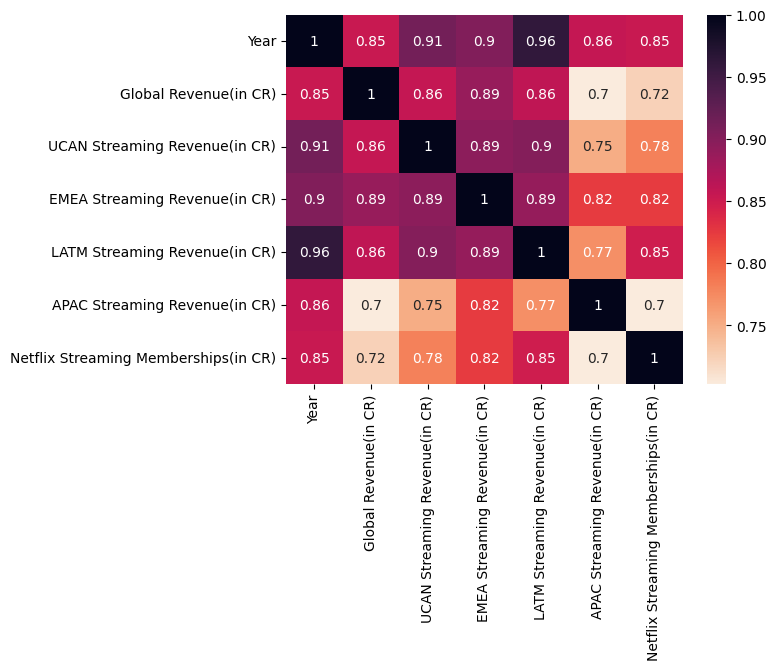

In [20]:
sns.heatmap(correlation_matrix,annot=True,fmt='.2g',cmap='rocket_r')

#### <u>Heatmap Conclusions</u>:
    -EMEA has STRONGEST POSITIVE CORRELATION with Global Revenue
    -Latin America has the secod strongest correlation with global revenue
    -UCAN comes 3rd in correlation with global revenue
    -Asia Pacific region contribute least to rise in global revenues

##### **The EUROPE,MIDDLE-EAST and AFRICA contributes MAXIMUM to Global revenue generation of NETFLIX**
##### **The EUROPE,MIDDLE-EAST and AFRICA have the Highest Correlation and LEAST P-Value**

## 3.2 <u>**Visualization**</u>:
    -Regression plot
    -Pair plot
    -Bar plot
    -Box plot

#### 3.2.1 <u>Regression Plots of All predictor Variables with Global Revenue:</u>

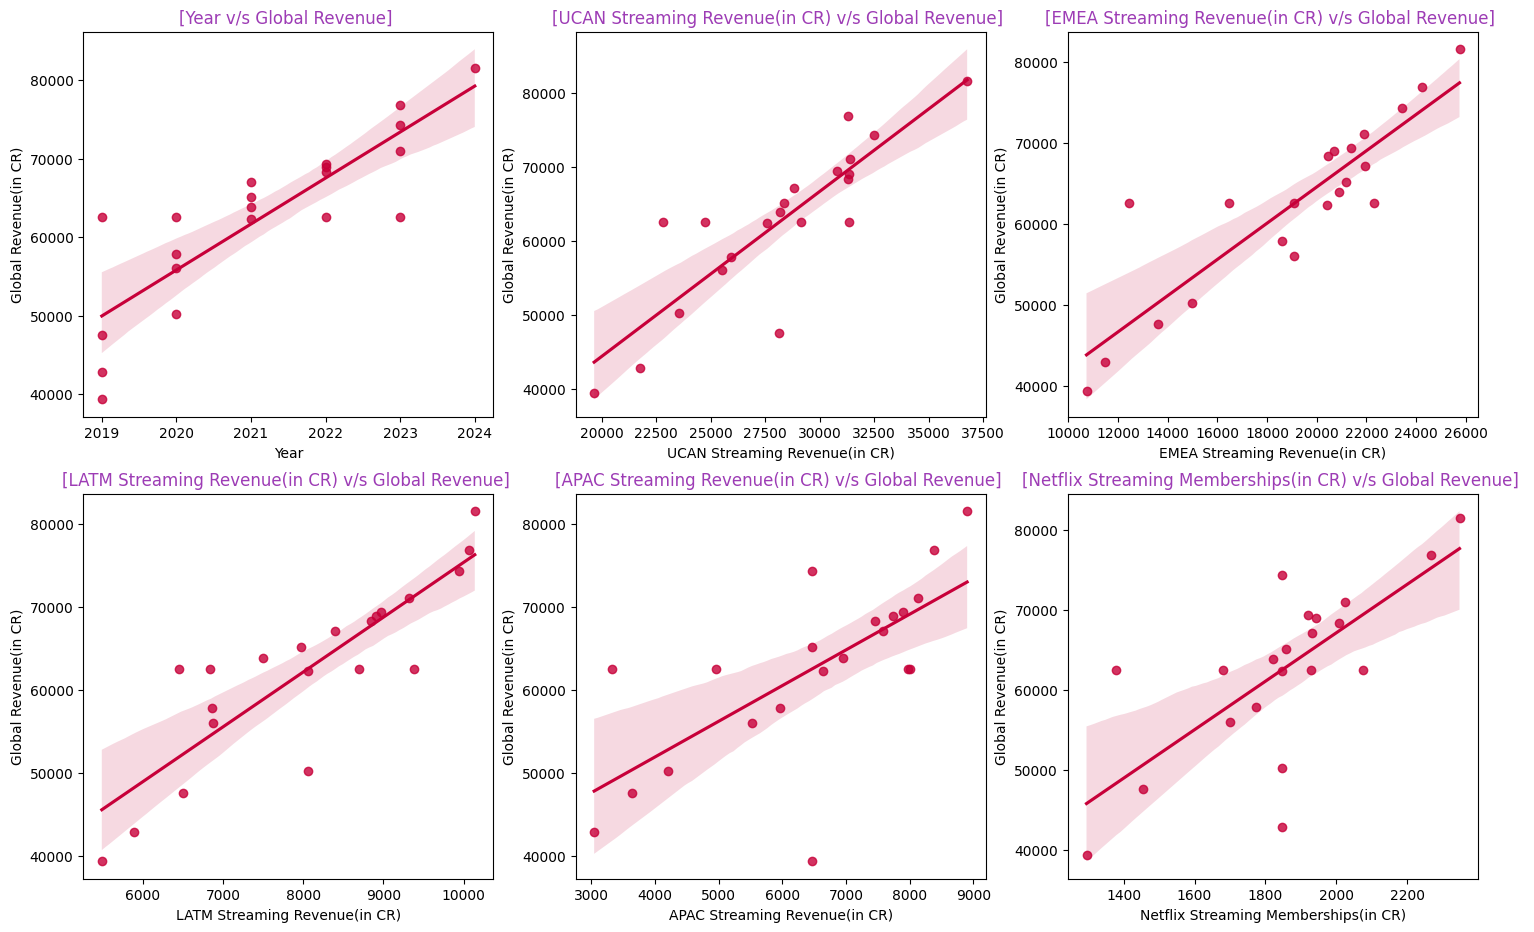

In [21]:
cols=['Year', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']
plt.subplots(2,3,figsize=(18,11))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.regplot(x=cols[i],y='Global Revenue(in CR)',data=df,color='#C70039')
    plt.title(f'[{cols[i]} v/s Global Revenue] ',color='#9d3cb5')

#### <u>Regplot Conclusions</u>:
    -All indicators show positive correlation with the Target variable
    -Europe,LATIN America have STRONGEST POSITIVE CORRELATION with Global Revenue( Viable for model building)
    - Although all indicators show positive correlation with the Target variable,the one that MAXIMIZES the global revenue is to be determined

#### 3.2.2 <u>Pair Plots of All predictor Variables with Global Revenue:</u>

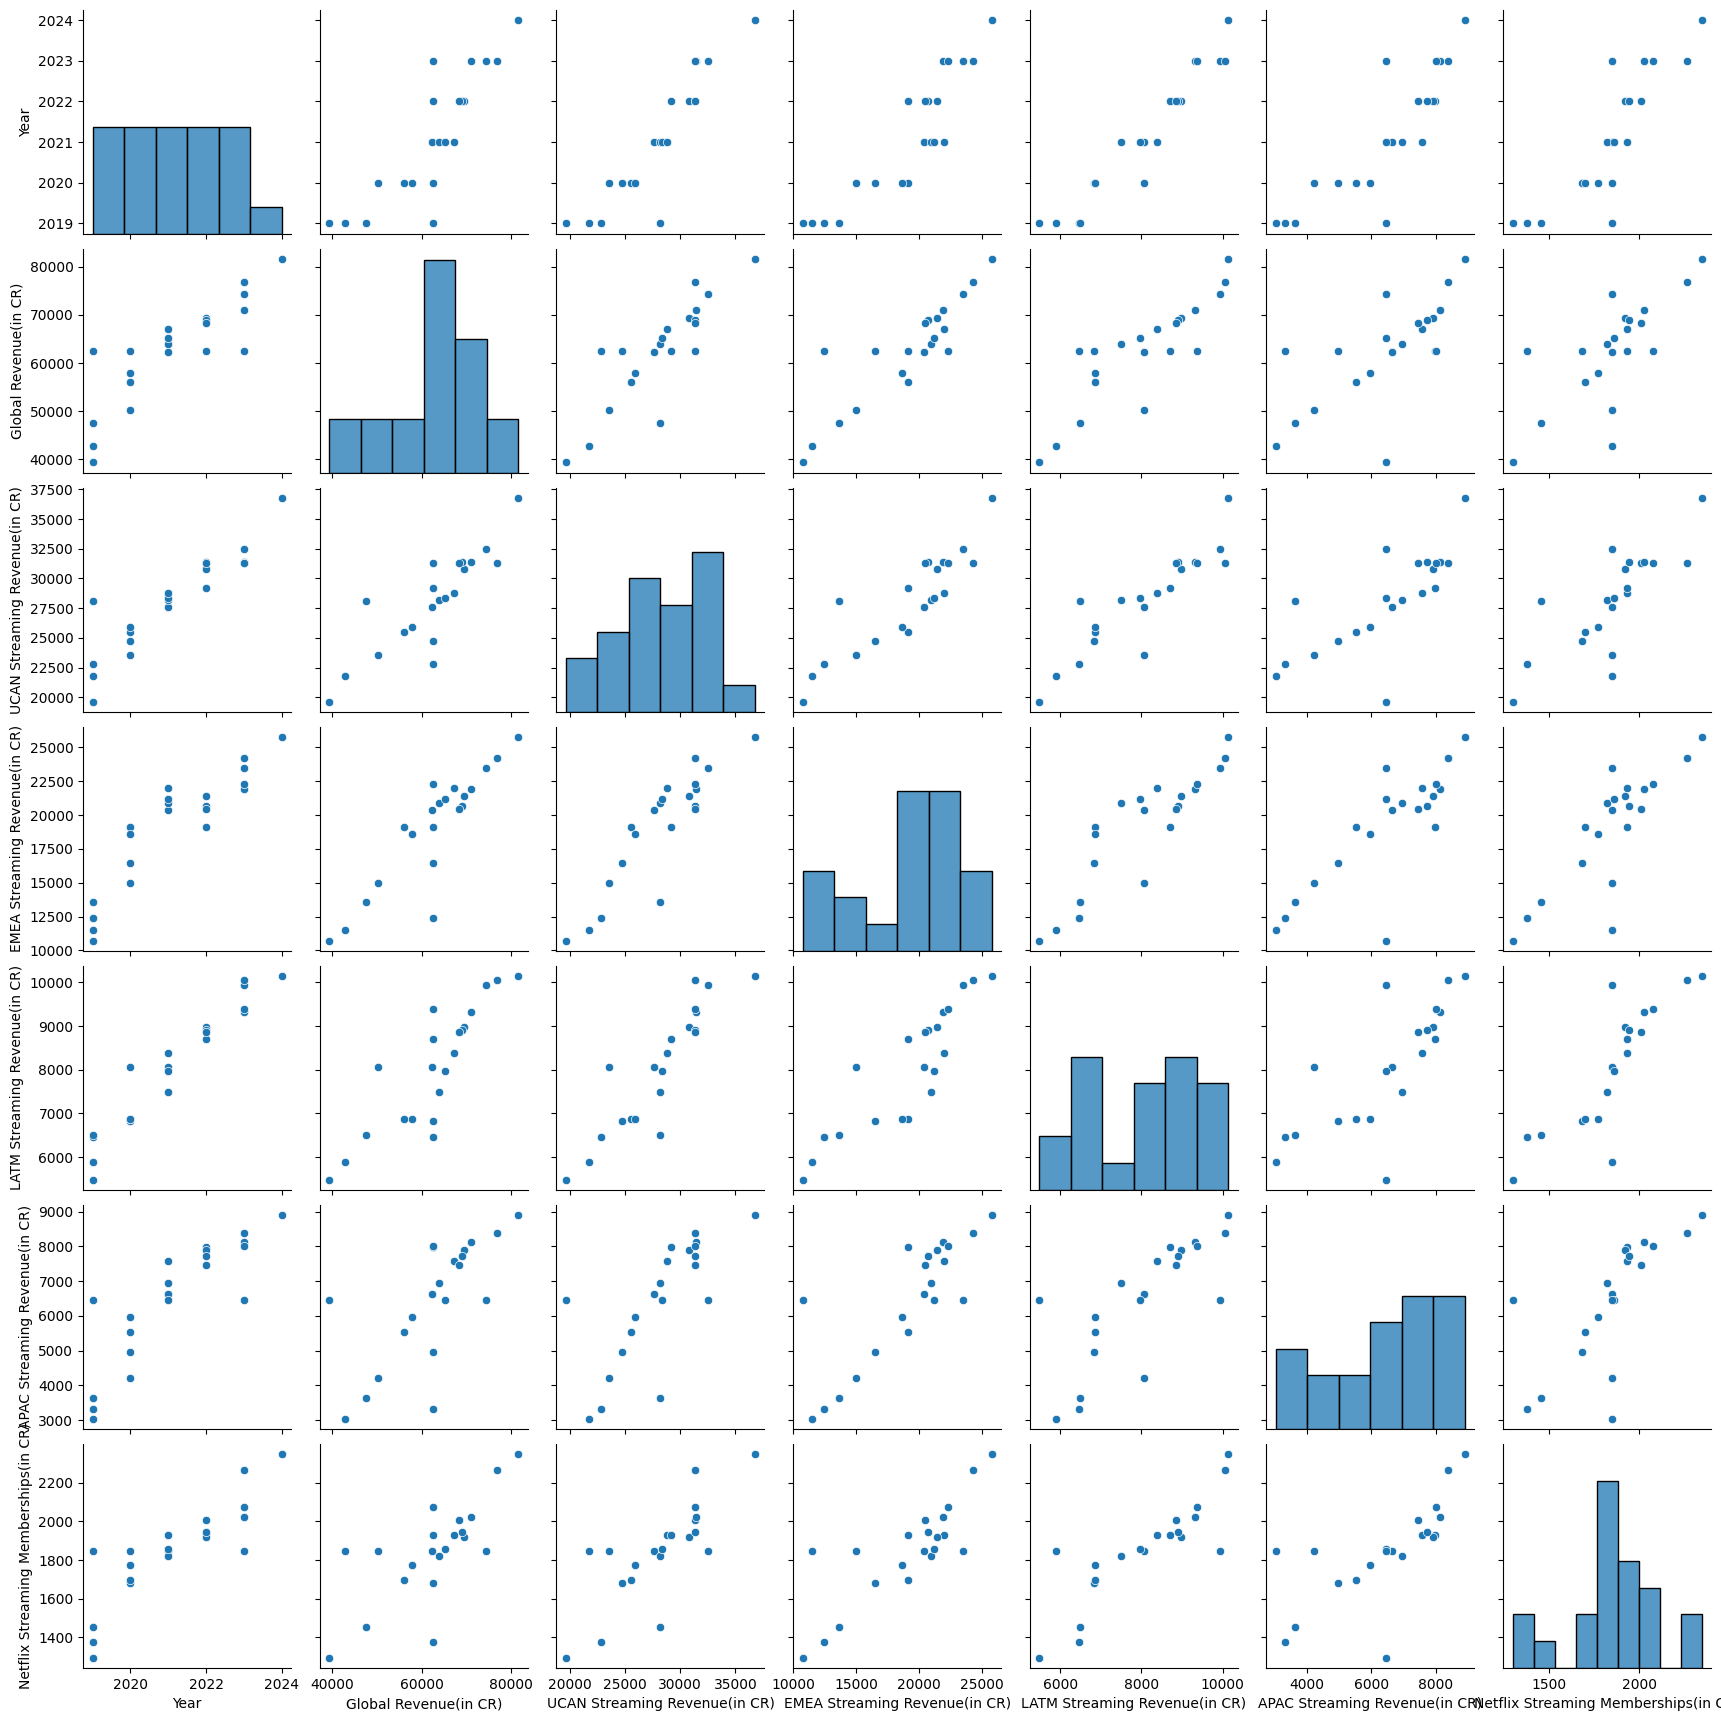

In [22]:
sns.pairplot(df)

#### 3.2.3 <u>Bar-Plots of All predictor Variables with Global Revenue:</u>

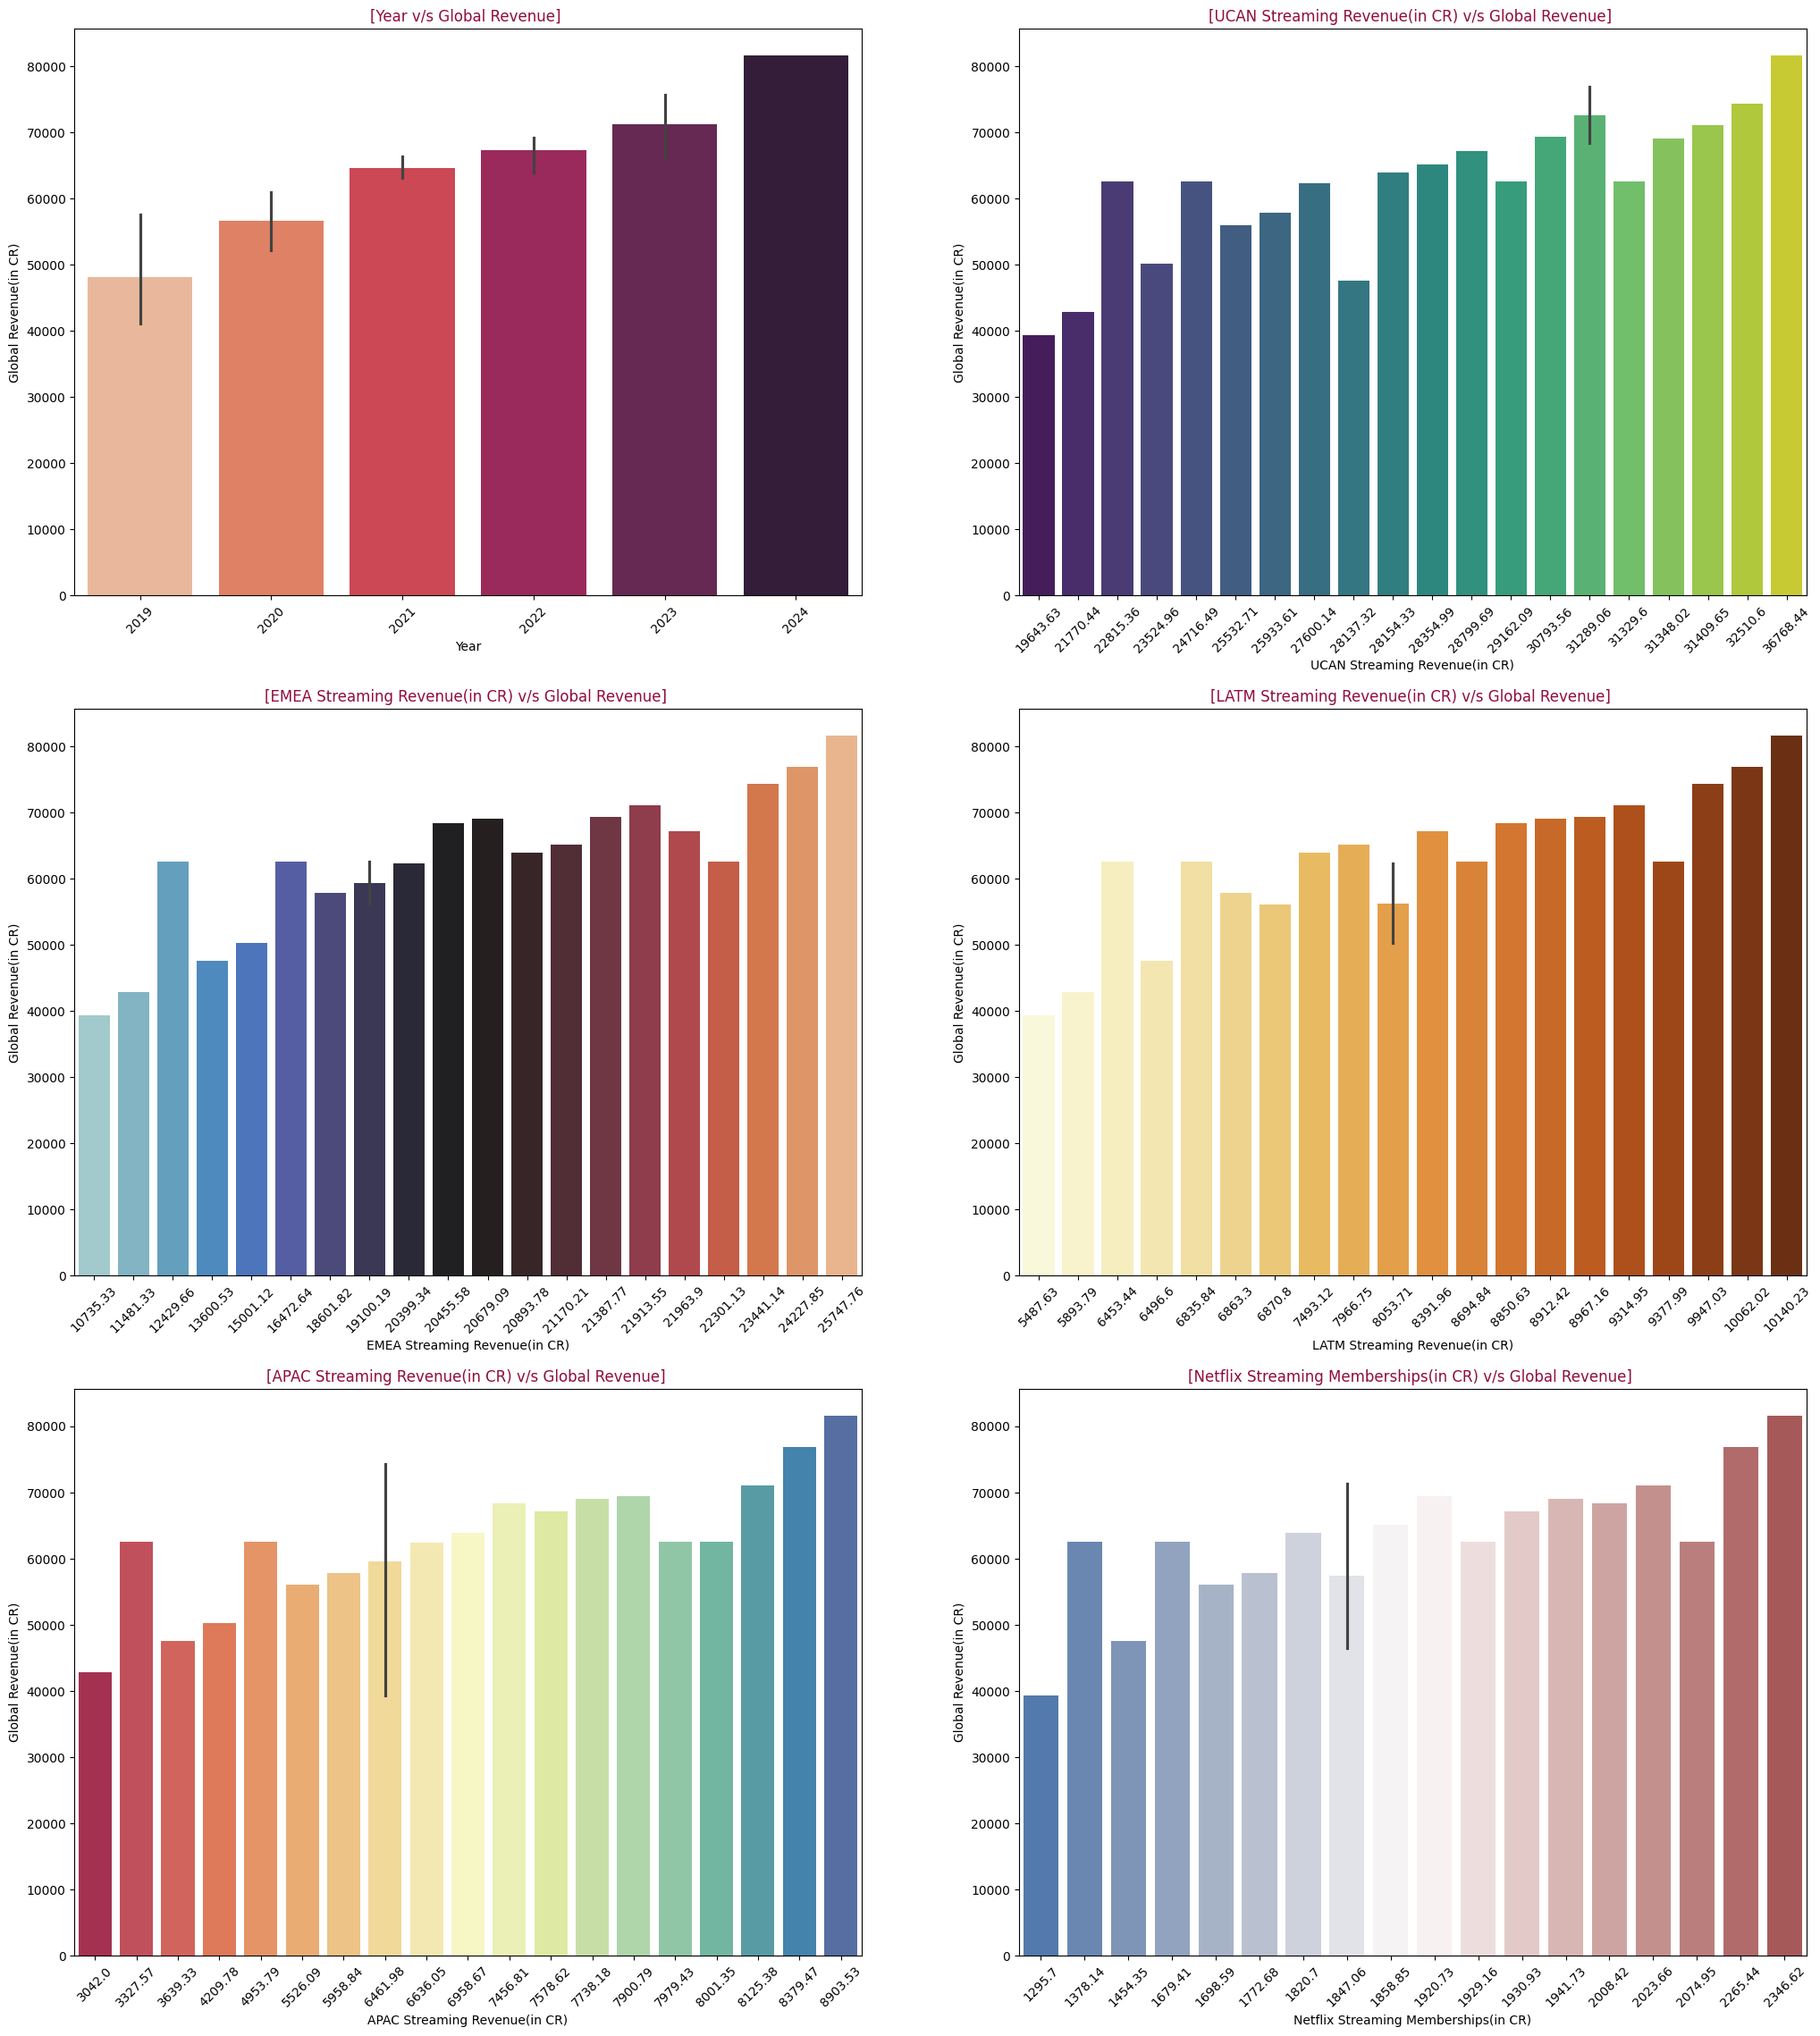

In [23]:
palettes=['rocket_r','viridis','icefire','YlOrBr','Spectral','vlag']
plt.subplots(3,2,figsize=(25,28))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.barplot(x=cols[i],y='Global Revenue(in CR)',data=df,palette=palettes[i])
    plt.title(f'[{cols[i]} v/s Global Revenue] ',color='#900C3F')
    plt.xticks(rotation=45)

#### <u>BAR plot Conclusions</u>:
    -All indicators show positive correlation with the Target variable
    -Year has a STEADY rise wrt. Global revenue, depicting-revenue growth was steady between 2019-2024

#### 3.2.4 <u>BOX Plots of All predictor Variables with Global Revenue:</u>

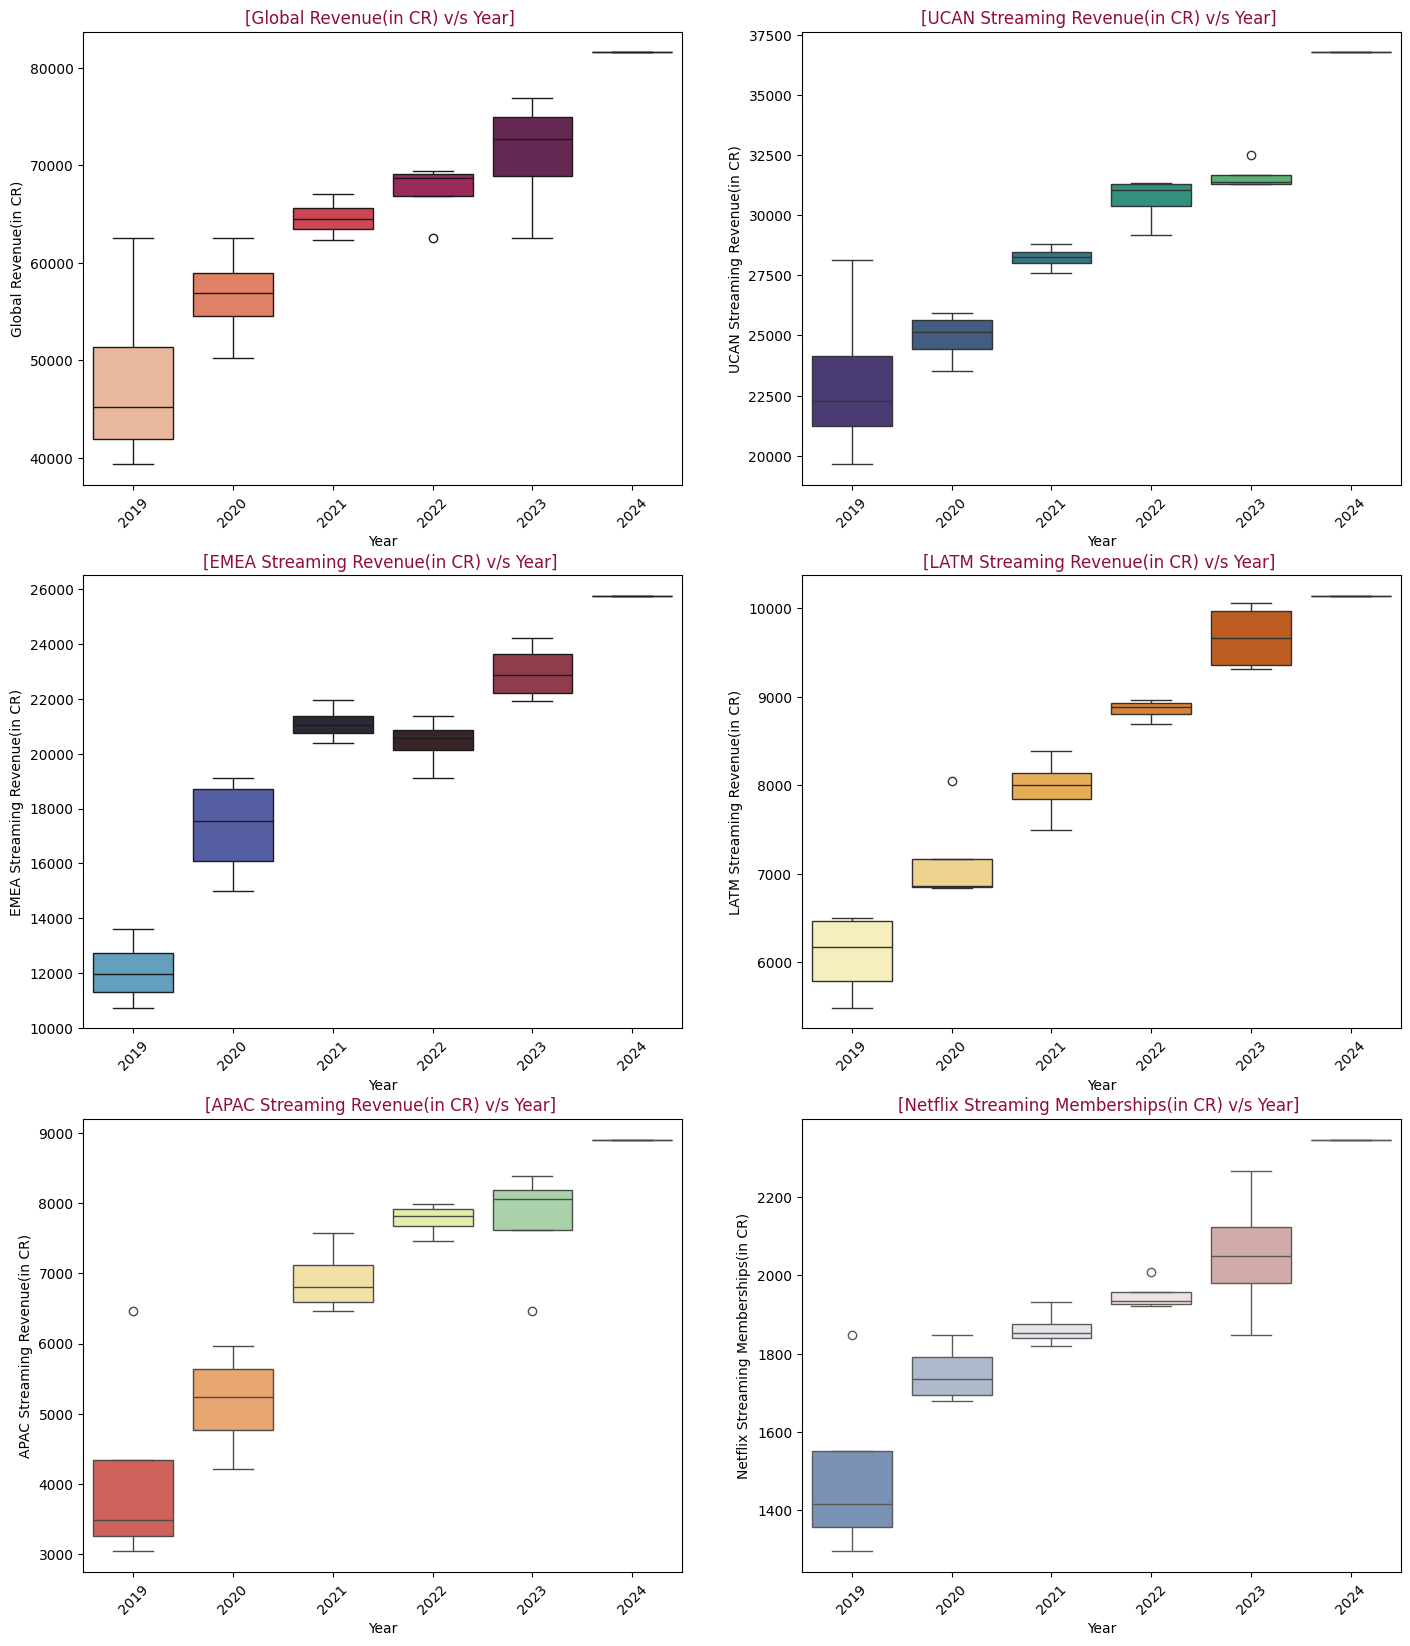

In [24]:
cols2=['Global Revenue(in CR)', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']

palettes=['rocket_r','viridis','icefire','YlOrBr','Spectral','vlag']
plt.subplots(3,2,figsize=(17,20))
for i in range(len(cols2)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x='Year',y=cols2[i],data=df,palette=palettes[i])
    plt.title(f'[{cols2[i]} v/s Year] ',color='#900C3F')
    plt.xticks(rotation=45)

### <u>**Year-By-Year BOX plot Conclusions**</u>:

##### <u>(i)Year V/S Global Revenue trends</u>:
    -In 2009,Global revenue varied largely b/w 40k CR to 50k CR[Large variation] with few revenues outlying around 60kCR
    -Between 2000 and 2021 Global revenues ranged largely betweem 50kCR to 60KCr and 60KCR to 70Kcr Resp
    -2022 and 2024 global revenue generation did not saw any large variations and lied below 70kCr and above 80k Cr resp.
    -significant revenue generation variation seen in the year 2023

##### <u>(ii)Year V/S USA and CANADA streaming revenue generation</u>:
    -The revenue generation between 2019 to 2024 ranged from 20k Cr to 37k Cr-HIGHEST among any of the member countries
    -Despite high revenue generation,The total contribution by UCAN members were still less than the EMEA member countries


##### <u>(iii)Year V/S Europe Middle-East and Africa streaming revenue generation</u>:
    -The revenue generation jumped ACUTELY between 2019 and 2020 by a margin or around 4k Cr.
    -The revenue generation fell in the year 2022 and caught up in 2023
    -Although the maximum revenue generation was around 26k Cr, the overall contribution to Global revenue is MAXIMUM from this group


##### <u>(iv)Year V/S Latin America streaming revenue generation</u>:
    -The revenue generated lied between 6k Cr and 10k Cr betweeen the years 2019 to 2024 ,which increased steadily
    -Despite lower revenue generation,it contributed highly(though less then EMEA) to global revenue 

##### <u>(v)Year V/S ASIA Pacific streaming revenue generation</u>:
    -The revenue generated lied between 3k Cr and 9k Cr betweeen the years 2019 to 2024 ,which increased steadily
    -The revenue generation from ASIA contributed almost the least,as compared to other member counties,to global revenue

##### <u>(vi)Maximum Contributors to Global Revenue</u>:
    - EUROPE,MIDDLE-EAST,AFRICA--->LATIN AMERICA--->USA,CANADA--->ASIA,PACIFIC

----------------

## 4. **Model Development and Model Training**:
    -Developing and Training "SLR(Simple Linear Regression)" Models for each Predictor variable
    -Developing and Training "MLR(Multiple Linear Regression)" Model
    -Developing and Training "POLYNOMIAL Regression Model"
    -Predicting Values using SLR,MLR and POLY Models

###  4.1<u>Simple Linear Regression</u>:
    -Predictor Variables: 'Year', 'UCAN Streaming Revenue(in CR)','EMEA Streaming Revenue(in CR)','LATM Streaming Revenue(in CR)',               'APAC Streaming Revenue(in CR)',Netflix Streaming Memberships(in CR)'

    -Target Variable: Global Revenue(in CR)

#### <u>SLR Regression Models and their Residuals</u>:

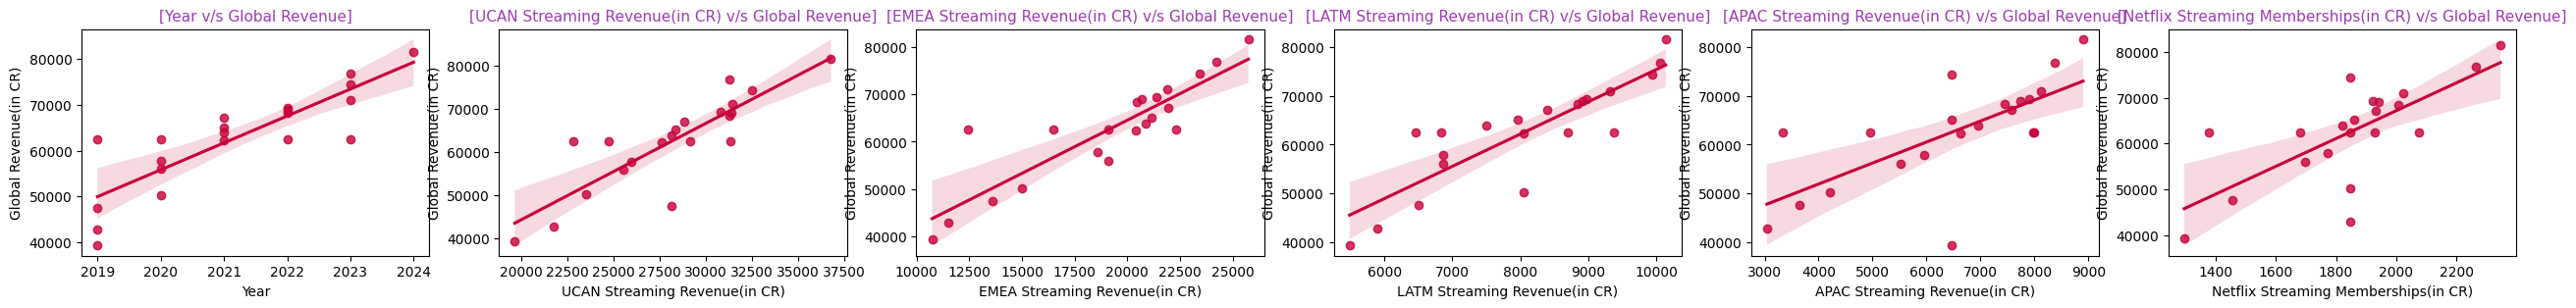

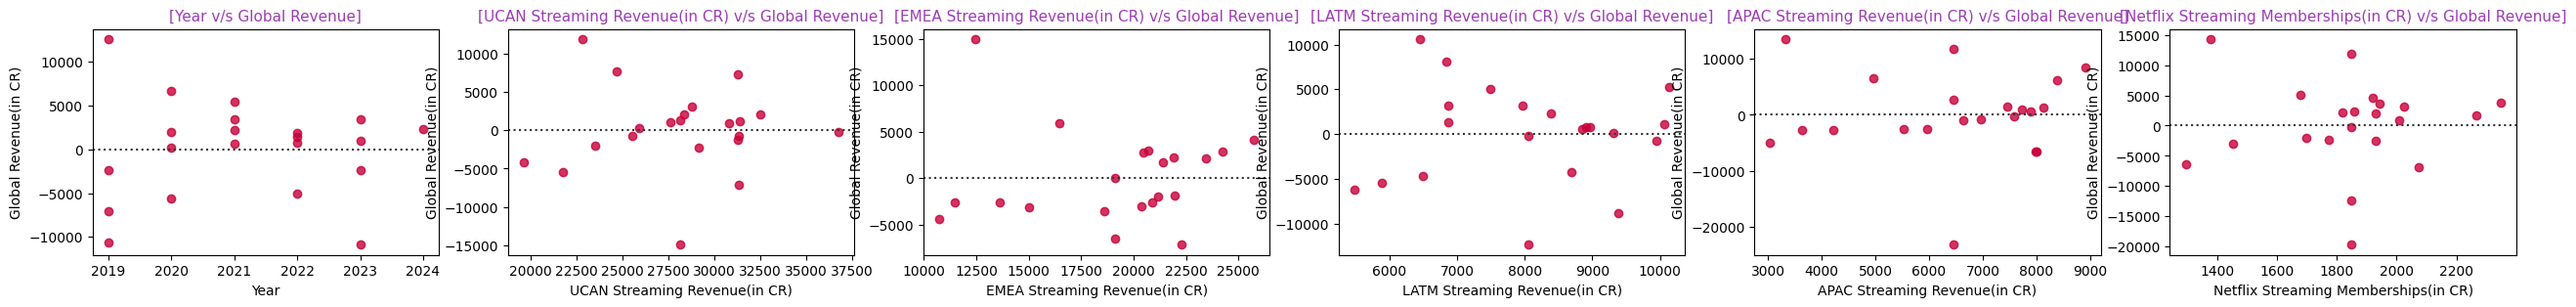

In [25]:
cols=['Year', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']
plt.subplots(1,6,figsize=(32,3))
for i in range(len(cols)):
    plt.subplot(1,6,i+1)
    sns.regplot(x=cols[i],y='Global Revenue(in CR)',data=df,color='#C70039')
    plt.title(f'[{cols[i]} v/s Global Revenue]',color='#9d3cb5',fontsize=11)
plt.subplots(1,6,figsize=(32,3))
for i in range(len(cols)):
    plt.subplot(1,6,i+1)
    sns.residplot(x=cols[i],y='Global Revenue(in CR)',data=df,color='#C70039')
    plt.title(f'[{cols[i]} v/s Global Revenue]',color='#9d3cb5',fontsize=11)


##### <u>Residual Plot deductions</u>:
    - Year model has uniform variance around x-axis,no curvature is found and has mean(of residuals) approx. = 0
    - UCAN model does not have uniform variance around x-axis,curvature is found and has mean(of residuals) approx. != 0
    - EMEA model does not have uniform variance around x-axis,curvature is found and has mean(of residuals) approx. != 0
    - LATM model does not have uniform variance around x-axis,curvature is found and has mean(of residuals) approx. != 0
    - APAC model does not have uniform variance around x-axis,curvature is found and has mean(of residuals) approx. != 0
    - Netflix streaming model does not have uniform variance around x-axis,curvature is found and has mean(of residuals) approx. != 0

##### <u>Conclusions</u>:
    -Only Year Variable is viable to have a SLR model
    -Due to non-uniform variance around x-ais and curvature in residuals,SLR might not be the best fit model-(probably MLR or Poly)


#### <u>Model Training</u>:

In [26]:
l=['Year', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']
#
slr_models=[0,0,0,0,0,0]
for i in range(6):
    slr=LinearRegression()
    slr_models[i]=slr.fit(df[[l[i]]],df['Global Revenue(in CR)'])


#### <u>Model Predicitons</u>:

In [27]:
model_names=['year_model','UCAN_model','EMEA_model','LATM_model','APAC_model','Netflix_membership_model']
df_slr_predictions=pd.DataFrame()
for i in range(6):
    df_slr_predictions[model_names[i]]=pd.DataFrame(slr_models[i].predict(df[[l[i]]]))
df_slr_predictions.head()

,year_model,UCAN_model,EMEA_model,LATM_model,APAC_model,Netflix_membership_model
0,49959.931127,43582.007012,43790.771579,45559.258087,62521.015140,45760.945740
1,49959.931127,48324.313657,45461.184972,48243.971461,47810.693826,62520.965433
2,49959.931127,50654.249598,47584.647616,51943.252137,49039.012839,48266.923728
3,49959.931127,62521.020148,50206.412937,52228.539288,50379.982603,50583.524680
4,55821.774157,52236.497564,53342.558103,62521.020186,52833.652739,62520.965433


###  4.2<u>Multiple Linear Regression</u>:
    -Predictor Variables: 'Year','UCAN Streaming Revenue(in CR)','EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)'

    -Target Variable: Global Revenue(in CR)

In [28]:
z=df[['Year','UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)']]

#### <u>Model Training</u>:

In [29]:
mlr=LinearRegression()
mlr.fit(z,df['Global Revenue(in CR)'])

LinearRegression()

#### <u>Model Predictions</u>:

In [30]:
mlr_predictions=mlr.predict(z)
df_mlr_predictions=pd.DataFrame(mlr_predictions)
df_mlr_predictions.columns=['MLR Predictions']
df_mlr_predictions.head()

,MLR Predictions
0,42250.027708
1,45414.918099
2,48656.346549
3,53178.089408
4,55628.108386


#### <u>Visualizing Distribution of Actual and Predicted Values</u>:

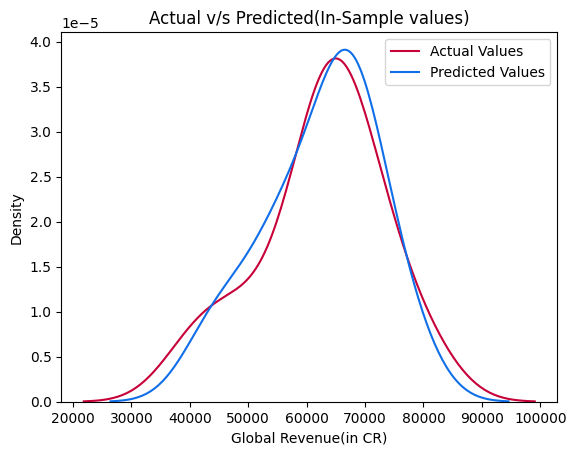

In [31]:
ax5=sns.distplot(df['Global Revenue(in CR)'],hist=False,label='Actual Values',color='#C70039')
sns.distplot(df_mlr_predictions,hist=False,label='Predicted Values',color='#106fe8',ax=ax5).set(title='Actual v/s Predicted(In-Sample values)')
plt.legend()

#### <u>Distribution Plot Conclusions</u>:
    -MLR fits almost perfectly
    -MLR is likely to be the most viable model for predictions

###  4.3<u>Polynomial Regression</u>:
    -Predictor Variables: 'Year'

    -Target Variable: Global Revenue(in CR)

#### <u>Fitting a 3rd Degree polynomial</u>:

In [32]:
#fitting 3rd degree polynomial
f=np.polyfit(df['EMEA Streaming Revenue(in CR)'],df['Global Revenue(in CR)'],3)
eq=np.poly1d(f)

#### <u>Predicitons</u>:

In [33]:
poly_predictions=eq(df['EMEA Streaming Revenue(in CR)'])
poly_predictions

array([42659.74709279, 45696.77793317, 48960.86213774, 52216.07932832,
       55246.62201062, 57769.76613497, 61811.97484675, 61012.15104427,
       64158.90032088, 65193.48507683, 65814.9609191 , 67798.38725879,
       61811.97484675, 66327.99272578, 64732.73038608, 64271.96170281,
       67663.00544974, 68741.55995748, 72452.30461599, 75553.93161362,
       83046.31459754])

#### <u>Visualizing Polynomial Regression Equation</u>:

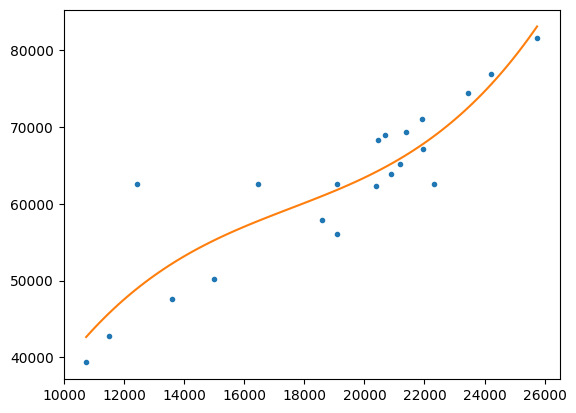

In [34]:
x_new = np.linspace(df['EMEA Streaming Revenue(in CR)'].min(),df['EMEA Streaming Revenue(in CR)'].max(),100)
y_new = eq(x_new)

plt.plot(df['EMEA Streaming Revenue(in CR)'], df['Global Revenue(in CR)'], '.', x_new, y_new, '-')

#### <u>Plot Conclusions</u>:
    -Looks a little overfit.SLR model suits better

--------------------

## 5. **Model Evaluation(In-Sample)**:
    -Calculating MSE(Mean Squared error) for all models
    -Calculating R2(R-Squared) for all the models

###  5.1 <u>**MSE(Mean Squared Error)**</u>:

#### <u>SLR Model MSE</u>:

In [35]:
model_names=['year_model','UCAN_model','EMEA_model','LATM_model','APAC_model','Netflix_membership_model']
for i in range(len(slr_models)):
    mse=mean_squared_error(df['Global Revenue(in CR)'],df_slr_predictions[model_names[i]])
    print(f'{model_names[i]} MSE: {mse}')

year_model MSE: 29871646.83485521
UCAN_model MSE: 29039481.122599464
EMEA_model MSE: 23118928.307406064
LATM_model MSE: 28401656.668271977
APAC_model MSE: 55381690.26228085
Netflix_membership_model MSE: 52297661.7301105


#### <u>MLR Model MSE</u>:

In [36]:
mse=mean_squared_error(df['Global Revenue(in CR)'],df_mlr_predictions)
print(f'MLR model MSE: {mse}')

MLR model MSE: 19856776.590799805


#### <u>Polynomial Model MSE</u>:

In [37]:
mse=mean_squared_error(df['Global Revenue(in CR)'],poly_predictions)
print(f'POLYNOMIAL model MSE: {mse}')

POLYNOMIAL model MSE: 20191570.945006553


#### <u>**Conclusion**</u>:
    -MLR Model has the Least MSE of : 19856776.59

###  5.2 <u>**R2(R-Squared)**</u>:

#### <u>SLR Model R2</u>:

In [38]:
model_names=['year_model','UCAN_model','EMEA_model','LATM_model','APAC_model','Netflix_membership_model']
actual_names=['Year', 'UCAN Streaming Revenue(in CR)','EMEA Streaming Revenue(in CR)',
               'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']
for i in range(6):
    r2=slr_models[i].score(df[[actual_names[i]]],df['Global Revenue(in CR)'])
    print(f'{model_names[i]} R2 Score: {r2}')



year_model R2 Score: 0.7268167158905547
UCAN_model R2 Score: 0.7344270683915104
EMEA_model R2 Score: 0.7885719259127476
LATM_model R2 Score: 0.7402601240674092
APAC_model R2 Score: 0.4935213277987559
Netflix_membership_model R2 Score: 0.521725499043927


#### <u>MLR Model R2</u>:

In [39]:
r2=mlr.score(z,df['Global Revenue(in CR)'])
print(f'MLR model R2-score: {r2}')

MLR model R2-score: 0.8184050758603401


#### <u>POLYNOMIAL Model R2</u>:

In [40]:
r2=r2_score(df['Global Revenue(in CR)'],poly_predictions)
print(f'POLYNOMIAL model R2-score: {r2}')

POLYNOMIAL model R2-score: 0.8153433022095891


#### <u>**Conclusion**</u>:
    -MLR Model has the MAX R2-score of : 0.8184
    -MLR R2-Score is closest to 1

#### <u>**Final Evaluation Conclusion**</u>:
    -MLR Model has the LEAST MSE and MAX R2-Score

--------------

## 6. **Model Testing and Refinement**:
    -Splitting the data into Training and Testing set using train_test_split()
    -Training the models using training data
    -Testing the models using testing data
    -Predicting values using models built to see the efficiency

#### <u>Splitting the data for Training and Testing</u>:

In [41]:
x_data=df.drop(['Global Revenue(in CR)'],axis=1)
y_data=df['Global Revenue(in CR)']
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)

In [42]:
x_data.head()

,Year,UCAN Streaming Revenue(in CR),EMEA Streaming Revenue(in CR),LATM Streaming Revenue(in CR),APAC Streaming Revenue(in CR),Netflix Streaming Memberships(in CR)
0,2019,19643.63,10735.33,5487.63,6461.98,1295.70
1,2019,21770.44,11481.33,5893.79,3042.00,1847.06
2,2019,22815.36,12429.66,6453.44,3327.57,1378.14
3,2019,28137.32,13600.53,6496.60,3639.33,1454.35
4,2020,23524.96,15001.12,8053.71,4209.78,1847.06


In [43]:
y_data.head()

0    39350.71
1    42850.80
2    62521.02
3    47588.55
4    50201.98
Name: Global Revenue(in CR), dtype: float64

###  6.1 <u>**SLR Out-Sample Testing**</u>:

#### <u>Model Training</u>:

In [44]:
l=['Year', 'UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)',
       'APAC Streaming Revenue(in CR)',
       'Netflix Streaming Memberships(in CR)']
#
slr_outsample_models=[0,0,0,0,0,0]
for i in range(6):
    slr_out=LinearRegression()
    slr_outsample_models[i]=slr_out.fit(x_train[[l[i]]],y_train)


#### <u>Prediction and Testing</u>:

In [45]:
model_names=['year_model','UCAN_model','EMEA_model','LATM_model','APAC_model','Netflix_membership_model']
df_slroutsample_predictions=pd.DataFrame()
for i in range(6):
    df_slroutsample_predictions[model_names[i]]=pd.DataFrame(slr_outsample_models[i].predict(x_test[[l[i]]]))

In [46]:
df_slroutsample_predictions.head()

,year_model,UCAN_model,EMEA_model,LATM_model,APAC_model,Netflix_membership_model
0,61113.337857,61253.076111,65126.159819,61906.912771,62370.222730,62626.423135
1,66258.790504,67805.217277,67158.997802,67111.151693,66443.048368,64670.332781
2,76549.695798,80064.255302,76125.898118,73794.535078,69672.158842,76486.277935
3,50822.432563,49291.913046,46785.084109,49601.105411,50796.350642,62626.423135
4,61113.337857,63714.268480,68343.885905,63834.039396,65405.568542,64953.322851


#### <u>Out-sample Model MSE</u>:

In [47]:
model_names=['year_model','UCAN_model','EMEA_model','LATM_model','APAC_model','Netflix_membership_model']
print('TESTING MSE')
for i in range(len(slr_outsample_models)):
    mse=mean_squared_error(y_test,df_slroutsample_predictions[model_names[i]])
    print(f'{model_names[i]} MSE: {mse}')

TESTING MSE
year_model MSE: 22763910.85348845
UCAN_model MSE: 9187039.11207256
EMEA_model MSE: 10346040.84592599
LATM_model MSE: 20072522.68131147
APAC_model MSE: 33768037.42650779
Netflix_membership_model MSE: 66043966.56295919


###  6.2 <u>**MLR Out-Sample Testing**</u>:

#### <u>Model Training</u>:

In [48]:
z=x_train[['Year','UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)']]
z_test=x_test[['Year','UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)']]
mlr_out=LinearRegression()
mlr_out.fit(z,y_train)

LinearRegression()

#### <u>Predicitons</u>:

In [49]:
mlr_out_predictions=mlr.predict(z_test)
df_mlroutsample_predictions=pd.DataFrame(mlr_out_predictions)
df_mlroutsample_predictions.columns=['MLR Predictions']
df_mlroutsample_predictions.head()

,MLR Predictions
0,64077.960289
1,68542.564253
2,78739.911103
3,45414.918099
4,67654.567945


#### <u>Visualizing Training and Testing Predictions</u>:

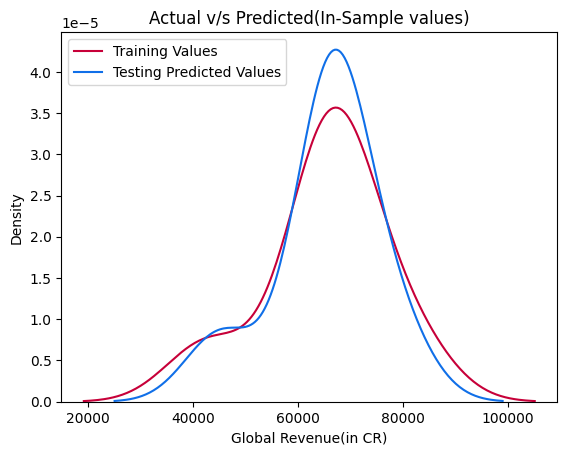

In [50]:
ax6=sns.distplot(y_test,hist=False,label='Training Values',color='#C70039')
sns.distplot(df_mlroutsample_predictions,hist=False,label='Testing Predicted Values',color='#106fe8',ax=ax6).set(title='Actual v/s Predicted(In-Sample values)')
plt.legend()

#### <u>Out-sample Model MSE</u>:

In [51]:
mse=mean_squared_error(y_test,mlr_out_predictions)
print(f'MSE for MLR out sample model :{mse}')

MSE for MLR out sample model :2860463.606366855


#### <u>Out-sample Model R2-Score</u>:

In [52]:
r2=mlr_out.score(z_test,y_test)
print(rf'R2 for MLR out sample model :{r2}')

R2 for MLR out sample model :0.9319767688130899


###  6.3 <u>**Polynomial Out-Sample Testing**</u>:

#### <u>Model Fitting  using a 3rd degree Polynomial</u>:

In [53]:
#fitting 3rd degree polynomial
f=np.polyfit(x_train['EMEA Streaming Revenue(in CR)'],y_train,3)
eq_out=np.poly1d(f)

#### <u>Model Predictions</u>:

In [54]:
poly_out_predictions=eq_out(x_test['EMEA Streaming Revenue(in CR)'])
poly_out_predictions

array([62928.00684893, 65326.42442628, 88417.21767424, 46867.48228046,
       67094.84721618, 64734.00891143, 63533.79293046])

#### <u>Visualizing Polyfit Out-sample model</u>:

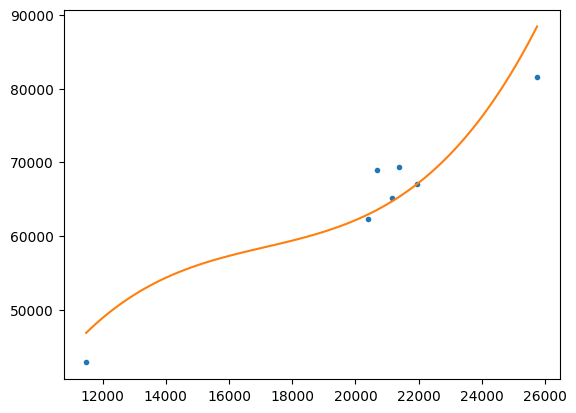

In [55]:
x_new = np.linspace(x_test['EMEA Streaming Revenue(in CR)'].min(),x_test['EMEA Streaming Revenue(in CR)'].max(),100)
y_new = eq_out(x_new)

plt.plot(x_test['EMEA Streaming Revenue(in CR)'], y_test, '.', x_new, y_new, '-')

#### <u>Plot conclusions</u>:
    -The data points are less ,hence the model either overfits the limited points or underfits

#### <u>Out-sample Poly Model MSE</u>:

In [56]:
mse=mean_squared_error(y_test,poly_out_predictions)
print(f'MSE for Polynomial model is {mse}')

MSE for Polynomial model is 15674796.897225246


#### <u>Out-sample Model R2-Score</u>:

In [57]:
r2=r2_score(y_test,poly_out_predictions)
print(f'R2 for Polynomial model is {r2}')

R2 for Polynomial model is 0.8646210601849303


#### <u>**Testing Conclusions**</u>:
    -Of all the out-sample models tested,MLR model performed the best
    -MSE of MLR model was least and R2-score was max

#### **MLR(Multiple Linear Regression) Model Minimizes the GENERALIZATION ERROR and is SELECTED FOR PREDICTIONS**:

-------------

## 7. **Cross Validating MLR model**:
    -Using cross_val_score 

#### <u>Cross validating R2-Score values using 4 Folds</u>:

In [58]:
#4 folds
c_score=cross_val_score(mlr,x_data[['Year','UCAN Streaming Revenue(in CR)',
       'EMEA Streaming Revenue(in CR)', 'LATM Streaming Revenue(in CR)']],y_data,cv=4)
c_score

array([-0.11008487, -1.34398765,  0.77244584,  0.59974049])

#### <u>Validation Conclusion</u>:
    -The MLR R2-Score values of the trained model are persorming well as compared to the cross validation values

--------------------------

## 8. **Final Price Prediction using the model**:
    -Selected model:MLR REGRESSION MODEL
    -Function:make_prediction_by_MLR
    -Input: Year of manufacturing
    -Output: Predicted price of the car
    -use case of model

### MODEL's ABILITY:
    -The model can predict Global revenue trend,if its supplied with :
        -YEAR(Streaming Revenue(in CR)
        -UCAN(Streaming Revenue(in CR)
        -EMEA(Streaming Revenue(in CR)
        -LATM(Streaming Revenue(in CR)

In [60]:
def make_prediction_by_mlr(year,ucan,emea,latm):
    inputs=[year,ucan,emea,latm]
    arr=np.array(inputs).reshape(-1,1)
    val=np.transpose(arr)
    df2=pd.DataFrame(val)
    prediction=mlr.predict(df2)

    print(f'The Gobal Revenue for {year} with emea={emea}Cr, ucan={ucan}Cr, latm={latm}Cr is predicted to be {prediction}Cr')

def input_revenue_data():
    year=int(input('Enter Financial year of Revenue: '))
    ucan=int(input('Enter Revenue generated by USA and CANADA in CR: '))
    emea=int(input('Enter Revenue generated by EUROPE,MIDDLE EASE AND AFRICA in CR: '))
    latm=int(input('Enter Revenue generated by LATIN AMERICA in CR: '))
    make_prediction_by_mlr(year,ucan,emea,latm)

input_revenue_data()


The Gobal Revenue for 2022 with emea=6700Cr, ucan=8000Cr, latm=9000Cr is predicted to be [36929.1016149]Cr


### **OUTPUT**: The **Gobal Revenue** for <span style='color:#FF5733'>**NETFLIX**</span> for year **2022** with **EMEA rev.=6700Cr**, **UCAN rev.=8000Cr**, **LATM rev.=9000Cr** is predicted to be **Rs.** <span style='color:#FF5733'>**36929.10 Cr.**</span>

-----------------

## 9 **Model's USE CASE**:
    -The model understands the strength of correlation among: revenue generated by specific regions of the world and its influence on Global revenue generation of NETFLIX

    -The model can recommed(along with descriptive analysis),the most profit maximizing regions and poor performing regions

    -The model can project NETFLIX global revenues based on inputs from revenue generated from various regions of the world

    -The model invariably can tell,which regions need to improve more, or performed poorly,or any other kind of irregularity in revenue increase

    -The above relevant info. can greatly help NETFLIX(or any org.) to maximize its profit or revenues

## 10 **Final Remarks and Conclusions**:
    -USA and CANADA are the highest revenue generating regions

    -Despite USA and CANADA's high revenue generation, EUROPE,MIDDLE-EAST, AFRICA and LATIN AMERICA influence NETFLIX GLOBAL Revenues the most

    -It becomes a matter of company's discretion,whether to exploit the highest revenue generating regions or to invest more in those regions that have greater share of contributions overall in their global revenues

    -ASIA-PACIFIC region has the contributes least among all the regions to NETFLIX global revenues 

    -Given the high population in these areas,greater investment needs to be done in ASIA PACIFIC region to impove their contribution share

    -Finally,all regions saw a gradual and steady(except few) increase in revenue over time


____END____

##### 
<span style='color:#FF5733'>  **'*'** **DISCLAIMER**</span>:
    -This project is a sole Intellectual property of mine i.e.<span style='color:#FF5733'> **GANDHARV GUPTA**</span>. Kindly acknowledge before copy or use of this project.The dataset is    open and is a property of Kaggle which holds all proprietary rights over it.</span>